# What sells a car?
The goal of this analysis is to study data collected over the last few years and determine which factors influence the price of a vehicle.


After loading the dataframe, we'll spend some time polishing it to ensure it’s ready to use. This data cleaning, consists of amending or removing incorrect or superfluous data, as well as checking for incompleteness or inconsistencies.

Then, I’ll begin to slice the data to extract meaningful insights from it. Using the techniques and methods of data analysis, I’ll look for hidden patterns and relationships, and find insights and predictions.
After I’ve interpreted the results and drawn meaningful insights from them, the next step is to create visualizations by selecting the most appropriate charts and graphs.

## Initialization

Load libraries that  are required for the project. 

In [1]:
# Loading all the libraries

import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

### Load data

Load the project data and have a look at the general information


In [2]:
# Load the data file into a DataFrame
try:
    data = pd.read_csv('vehicles_us.csv')
except:
    data= pd.read_csv('/datasets/vehicles_us.csv')


### Explore initial data

The dataset contains the following fields:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, diesel, etc.
- `odometer` — the vehicle's mileage when the ad was published
- `transmission`
- `paint_color`
- `is_4wd` — whether the vehicle has 4-wheel drive (Boolean type)
- `date_posted` — the date the ad was published
- `days_listed` — from publication to removal



print the general/summary information about the DataFrame

In [3]:

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [4]:
data.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


let's check some statistics:

In [5]:
data.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


print a sample of data

In [6]:

data.sample(20)


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
8519,11995,2002.0,jeep wrangler,excellent,6.0,gas,86000.0,manual,SUV,red,1.0,2018-09-10,17
17221,4650,2006.0,acura tl,excellent,6.0,gas,151265.0,automatic,sedan,black,NaN,2018-11-18,5
39709,12999,NaN,ford f-150,excellent,8.0,gas,168336.0,automatic,pickup,grey,1.0,2019-01-15,49
26453,4500,2003.0,chevrolet suburban,good,8.0,gas,192391.0,automatic,SUV,black,NaN,2019-01-14,27
19290,15999,2017.0,ford escape,good,4.0,gas,30683.0,automatic,SUV,custom,1.0,2018-06-14,24
15967,8360,2009.0,subaru outback,excellent,4.0,gas,140743.0,automatic,wagon,green,1.0,2018-09-12,18
13471,2500,2011.0,chevrolet suburban,excellent,8.0,gas,158520.0,automatic,SUV,white,NaN,2019-03-06,16
18331,14399,2012.0,ford f150,excellent,8.0,gas,114363.0,automatic,truck,black,1.0,2018-12-30,67
35745,54000,2018.0,chevrolet silverado 2500hd,excellent,8.0,diesel,17860.0,automatic,truck,white,1.0,2018-12-08,19
49571,5995,2006.0,chevrolet impala,good,8.0,gas,NaN,automatic,sedan,black,NaN,2018-12-05,23


The column 'is_4wd' has a lot of missing values which probably can be replaced with zeros, where 0 means that the car do not have 4wheel drive. I am interested in fixing this issue because this feature can be an important factor impacting the car price: 4WD improves traction in dangerous driving conditions, such as snow, ice, rocks, and other scenarios that can make control difficult. By engaging both sets of wheels, traction and control improves. 

In [7]:
data['model_year'].dtypes

dtype('float64')

In [8]:
data['date_posted'].dtypes

dtype('O')

Python has a special data type we use to work with dates and times: datetime. The data about the year of production, and the date when the ad was posted, will need to be converted to datetime data type.

checking the columns with missing values:

In [9]:
data.isnull().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

I want to see the percentage of missing values in each column

In [10]:
data.isnull().sum()/len(data)

price           0.000000
model_year      0.070238
model           0.000000
condition       0.000000
cylinders       0.102086
fuel            0.000000
odometer        0.153168
transmission    0.000000
type            0.000000
paint_color     0.179854
is_4wd          0.503697
date_posted     0.000000
days_listed     0.000000
dtype: float64

In [11]:
mis_values = data.isnull().sum().to_frame('missing_values')
mis_values['%'] = round(data.isnull().sum()/len(data),3)
mis_values.sort_values(by='%', ascending=False)

,missing_values,%
is_4wd,25953,0.504
paint_color,9267,0.180
odometer,7892,0.153
cylinders,5260,0.102
model_year,3619,0.070
price,0,0.000
model,0,0.000
condition,0,0.000
fuel,0,0.000
transmission,0,0.000


There are missing values in five columns and so far, the missing data look absolutely random, at this stage I don't recognize any pattern.

checking for 0's: the function retuns the columns where I have values 0:

In [12]:

for i in data:
    print(i, len(data[data[i]==0]))

    

price 0
model_year 0
model 0
condition 0
cylinders 0
fuel 0
odometer 185
transmission 0
type 0
paint_color 0
is_4wd 0
date_posted 0
days_listed 54


### Conclusions and further steps


Overall it looks a like a good set of data, with just few issue to address, so we can carry out an accurate analysis. 

I want to check the rows with odometer data=0, because not even new cars have 0 kms, so i want to make a small reserach about it.
after a quick search, I found out that A kilometer-zero car is a car registered by the dealer or brand and sold at a mileage of less than 100 km . They are cars that benefit from big discounts, compared to new cars.
probably the mileage will be a factor which impact the price, so we'll want to replace missing values by replacing with medians calculated on groups of car for model and year production.


## Treat missing values (if any)

checking the distribution of model_year:

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='model_year'>

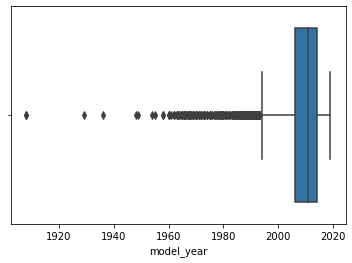

In [13]:

import seaborn as sns

sns.boxplot(data.model_year)


C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='model_year', ylabel='Density'>

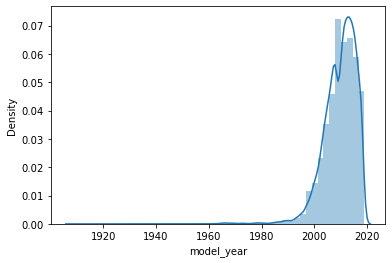

In [14]:

sns.distplot(data.model_year)

'model_year' is clearly right skewed data.I will replace missing values using Mode, whiche refers to a number in a set of numbers that appears the most often.

In [15]:
data.model_year.unique()

array([2011.,   nan, 2013., 2003., 2017., 2014., 2015., 2012., 2008.,
       2018., 2009., 2010., 2007., 2004., 2005., 2001., 2006., 1966.,
       1994., 2019., 2000., 2016., 1993., 1999., 1997., 2002., 1981.,
       1995., 1996., 1975., 1998., 1985., 1977., 1987., 1974., 1990.,
       1992., 1991., 1972., 1967., 1988., 1969., 1989., 1978., 1965.,
       1979., 1968., 1986., 1980., 1964., 1963., 1984., 1982., 1973.,
       1970., 1955., 1971., 1976., 1983., 1954., 1962., 1948., 1960.,
       1908., 1961., 1936., 1949., 1958., 1929.])

In [16]:
data['model_year'] = (data.groupby('model')['model_year']
                   .apply(lambda g: g.fillna(g.mode()[0], downcast='infer'))
                )


I filled the missing values in 'model_year', using the 'mode', so the most common value for   the grouped items will be returned instead of nan

In [17]:
data.model_year.unique()

array([2011, 2013, 2003, 2017, 2014, 2015, 2012, 2008, 2018, 2009, 2010,
       2007, 2004, 2005, 2001, 2006, 1966, 1994, 2019, 2000, 2016, 1993,
       1999, 1997, 2002, 1981, 1995, 1996, 1975, 1998, 1985, 1977, 1987,
       1974, 1990, 1992, 1991, 1972, 1967, 1988, 1969, 1989, 1978, 1965,
       1979, 1968, 1986, 1980, 1964, 1963, 1984, 1982, 1973, 1970, 1955,
       1971, 1976, 1983, 1954, 1962, 1948, 1960, 1908, 1961, 1936, 1949,
       1958, 1929], dtype=int64)

the unique nan disappeared

In [18]:
#data['model_year'] = data['model_year'].fillna(data.groupby('model')['model_year'].transform('mode'))

<div class="alert alert-success">

    
An alternative code: You can fill it with mode in the following way, where we are picking the most common category per aggregated table. 
    
    data['model_year'].fillna(data.groupby(["model"])['model_year'].transform(lambda x : x.mode()[0]))


In [19]:
mis_values = data.isnull().sum().to_frame('missing_values')
mis_values['%'] = round(data.isnull().sum()/len(data),3)
mis_values.sort_values(by='%', ascending=False)

,missing_values,%
is_4wd,25953,0.504
paint_color,9267,0.180
odometer,7892,0.153
cylinders,5260,0.102
price,0,0.000
model_year,0,0.000
model,0,0.000
condition,0,0.000
fuel,0,0.000
transmission,0,0.000


we can see that model_year has no missing values


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  int64  
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 5.1+ MB


since previously I used downcast=infer, my data on column "model_year are now of the type integers. in order to use the years for further analisys, I will convert to datetime.

I will treat missing values for cylinders, by replacing NaN with the median of the cylinders for the same model

In [21]:
medians_cyl = data.groupby('model')['cylinders'].transform('median')

data['cylinders'] = data['cylinders'].fillna(medians_cyl)
print(data['cylinders'])

0        6.0
1        6.0
2        4.0
3        8.0
4        4.0
        ... 
51520    6.0
51521    4.0
51522    4.0
51523    4.0
51524    4.0
Name: cylinders, Length: 51525, dtype: float64


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  int64  
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 5.1+ MB


I will consider as an example, the rows [12091] and [45480], where the cylinders was previously NaN. let's see how the missing values have been replaced. The models of this two rows were chrysler 300 and chevrolet suburban

In [23]:
print(data.query('model == "chrysler 300"'))

       price  model_year         model  condition  cylinders fuel  odometer  \
5      14990        2014  chrysler 300  excellent        6.0  gas   57954.0   
36     10499        2013  chrysler 300       good        6.0  gas   88042.0   
337     5999        2007  chrysler 300  excellent        6.0  gas  122000.0   
427     4995        2006  chrysler 300       good        6.0  gas  160270.0   
731    10900        2011  chrysler 300  excellent        6.0  gas  111500.0   
...      ...         ...           ...        ...        ...  ...       ...   
50370   5200        2013  chrysler 300       good        6.0  gas  189526.0   
50574   6573        2009  chrysler 300  excellent        6.0  gas       NaN   
50798   3900        2007  chrysler 300  excellent        6.0  gas       NaN   
50813   4500        2005  chrysler 300  excellent        6.0  gas  172000.0   
51144   6950        2012  chrysler 300       good        6.0  gas  134511.0   

      transmission   type paint_color  is_4wd date_

In [24]:
print(data.query('model == "chevrolet suburban"'))

       price  model_year               model  condition  cylinders fuel  \
143    11995        2012  chevrolet suburban  excellent        8.0  gas   
340    12995        2009  chevrolet suburban  excellent        8.0  gas   
389    11995        2012  chevrolet suburban       good        8.0  gas   
410     5890        2004  chevrolet suburban       good        8.0  gas   
463     7500        2007  chevrolet suburban       good        8.0  gas   
...      ...         ...                 ...        ...        ...  ...   
50980  12995        2013  chevrolet suburban  excellent        8.0  gas   
51122  48000        2018  chevrolet suburban   like new        8.0  gas   
51155   6000        2002  chevrolet suburban  excellent        8.0  gas   
51384   4995        2004  chevrolet suburban       good        8.0  gas   
51448   8890        2009  chevrolet suburban       good        8.0  gas   

       odometer transmission   type paint_color  is_4wd date_posted  \
143    158487.0    automatic

In [25]:
display(data.loc[12091])
display(data.loc[45480])

price                   4900
model_year              2007
model           chrysler 300
condition          excellent
cylinders                6.0
fuel                     gas
odometer            135000.0
transmission       automatic
type                   sedan
paint_color            white
is_4wd                   NaN
date_posted       2018-11-23
days_listed               47
Name: 12091, dtype: object

price                         3500
model_year                    1999
model           chevrolet suburban
condition                excellent
cylinders                      8.0
fuel                           gas
odometer                       NaN
transmission             automatic
type                           SUV
paint_color                   grey
is_4wd                         1.0
date_posted             2018-12-10
days_listed                     16
Name: 45480, dtype: object

we can see that the missing values for cylinders has been replaced accordingly with the same number of cylinders for the same models, which make sense and gives us reliable data. I feel confident enough to use the same process to fill the missing values in other columns


Treating missing values in odometer:

In [26]:
medians_odo = data.groupby('model')['odometer'].transform('median')

data['odometer'] = data['odometer'].fillna(medians_odo)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  int64  
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      51484 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 5.1+ MB


there are still some missing values in Odometer... why? let's explore

In [27]:
data.odometer.sort_values()

31461    0.0
36165    0.0
10259    0.0
48980    0.0
30191    0.0
        ... 
44698    NaN
48012    NaN
48483    NaN
50547    NaN
50624    NaN
Name: odometer, Length: 51525, dtype: float64

analyzing those rows

In [28]:
display(data.loc[44698])
display(data.loc[48012])   
display(data.loc[48483]) 
display(data.loc[50547])  
display(data.loc[50624]) 

price                                       34900
model_year                                   2013
model           mercedes-benz benze sprinter 2500
condition                               excellent
cylinders                                     6.0
fuel                                       diesel
odometer                                      NaN
transmission                            automatic
type                                          van
paint_color                                 black
is_4wd                                        NaN
date_posted                            2019-01-16
days_listed                                    17
Name: 44698, dtype: object

price                                       34900
model_year                                   2013
model           mercedes-benz benze sprinter 2500
condition                               excellent
cylinders                                     6.0
fuel                                       diesel
odometer                                      NaN
transmission                            automatic
type                                          van
paint_color                                 black
is_4wd                                        NaN
date_posted                            2018-10-14
days_listed                                    19
Name: 48012, dtype: object

price                                       34900
model_year                                   2013
model           mercedes-benz benze sprinter 2500
condition                               excellent
cylinders                                     6.0
fuel                                       diesel
odometer                                      NaN
transmission                            automatic
type                                          van
paint_color                                 black
is_4wd                                        NaN
date_posted                            2018-08-19
days_listed                                    27
Name: 48483, dtype: object

price                                       34900
model_year                                   2013
model           mercedes-benz benze sprinter 2500
condition                               excellent
cylinders                                     6.0
fuel                                       diesel
odometer                                      NaN
transmission                            automatic
type                                          van
paint_color                                 black
is_4wd                                        NaN
date_posted                            2018-12-28
days_listed                                    49
Name: 50547, dtype: object

price                                       34900
model_year                                   2013
model           mercedes-benz benze sprinter 2500
condition                               excellent
cylinders                                     6.0
fuel                                       diesel
odometer                                      NaN
transmission                            automatic
type                                          van
paint_color                                 black
is_4wd                                        NaN
date_posted                            2019-04-13
days_listed                                    40
Name: 50624, dtype: object

In [29]:
mercedes=data.query('model =="mercedes-benz benze sprinter 2500"')
mercedes.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,41.0,41.0,41.0,0.0,0.0,41.000000
mean,34900.0,2013.0,6.0,NaN,NaN,38.560976
std,0.0,0.0,0.0,NaN,NaN,23.480895
min,34900.0,2013.0,6.0,NaN,NaN,1.000000
25%,34900.0,2013.0,6.0,NaN,NaN,20.000000
50%,34900.0,2013.0,6.0,NaN,NaN,34.000000
75%,34900.0,2013.0,6.0,NaN,NaN,50.000000
max,34900.0,2013.0,6.0,NaN,NaN,99.000000


this is the same car, adverstised 41 times. i still have 41 missing values in odometer and all belongs to this car. I would like to drop these rows, but they may contain important data: why the owner kept posting it? why couldn't they sell it?

In [30]:
mercedes.sort_values(by='date_posted')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
42116,34900,2013,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,NaN,2018-05-18,50
31895,34900,2013,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,NaN,2018-05-21,59
36518,34900,2013,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,NaN,2018-05-26,34
42503,34900,2013,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,NaN,NaN,2018-05-28,14
11541,34900,2013,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,NaN,NaN,2018-05-28,24
25982,34900,2013,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,NaN,2018-06-06,37
23445,34900,2013,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,NaN,NaN,2018-06-13,20
14796,34900,2013,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,NaN,NaN,2018-07-29,1
18811,34900,2013,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,NaN,2018-08-03,52
48483,34900,2013,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,NaN,2018-08-19,27


In [31]:
mercedes.sort_values(by='days_listed')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
14796,34900,2013,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,NaN,NaN,2018-07-29,1
39904,34900,2013,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,NaN,2019-02-13,7
11916,34900,2013,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,NaN,2019-02-19,7
34905,34900,2013,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,NaN,2019-03-09,13
42393,34900,2013,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,NaN,2018-10-28,14
42503,34900,2013,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,NaN,NaN,2018-05-28,14
14871,34900,2013,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,NaN,2018-10-09,16
42,34900,2013,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,NaN,2019-01-15,16
44698,34900,2013,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,NaN,2019-01-16,17
48012,34900,2013,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,NaN,2018-10-14,19


it looks like they could't sell the car for a year. ***I will keep the row with days_listed=99 and drop the rest***

In [32]:
data.odometer.median()

115376.0

In [33]:
data.at[17493,'odometer']=data.odometer.median()


In [34]:
data.loc[17493,'odometer']

115376.0

In [35]:
data.loc[17493]

price                                       34900
model_year                                   2013
model           mercedes-benz benze sprinter 2500
condition                               excellent
cylinders                                     6.0
fuel                                       diesel
odometer                                 115376.0
transmission                            automatic
type                                          van
paint_color                                 black
is_4wd                                        NaN
date_posted                            2019-01-28
days_listed                                    99
Name: 17493, dtype: object

I just replaced the missing value in this specific row

In [36]:
data=data.dropna(subset=['odometer'])

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51485 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51485 non-null  int64  
 1   model_year    51485 non-null  int64  
 2   model         51485 non-null  object 
 3   condition     51485 non-null  object 
 4   cylinders     51485 non-null  float64
 5   fuel          51485 non-null  object 
 6   odometer      51485 non-null  float64
 7   transmission  51485 non-null  object 
 8   type          51485 non-null  object 
 9   paint_color   42225 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51485 non-null  object 
 12  days_listed   51485 non-null  int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 5.5+ MB


no more missing values in Odometer

Now I want to address the 'four wheel drive' factor: I will simply replace NaN with 0, with the assumption that the data for this feature was not listed because the vehicle doesn't have it. Since it's an important feature, when considering the purchase/sale of a car, I think the seller would be interested in listing it, therefore where there is no data, I will assume that that specific vehicle doesn't have it. I could try to replace it by grouping the models, but in many cases we can have the same model with 4dw/AWD or 2wd.

In [38]:
data['is_4wd'] = data['is_4wd'].replace(np.nan, 0)

<div class="alert alert-block alert-success">



**`is_4wd`**
    
Indeed, `is_4wd` contains a boolean type of information (yes/no). So filling missing data with 0 will allow us to keep a potentially useful feature. 


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51485 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51485 non-null  int64  
 1   model_year    51485 non-null  int64  
 2   model         51485 non-null  object 
 3   condition     51485 non-null  object 
 4   cylinders     51485 non-null  float64
 5   fuel          51485 non-null  object 
 6   odometer      51485 non-null  float64
 7   transmission  51485 non-null  object 
 8   type          51485 non-null  object 
 9   paint_color   42225 non-null  object 
 10  is_4wd        51485 non-null  float64
 11  date_posted   51485 non-null  object 
 12  days_listed   51485 non-null  int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 5.5+ MB


the last columnn with missing values, is paint_color, categorical values. To fill missing values in Categorical features, we can  filling with most occurring class

One approach to fill these missing values can be to replace them with the most common or occurring class. We can do this by taking the index of the most common class which can be determined by using value_counts() method

In [40]:
#data = data.apply(lambda x: x.fillna(x.value_counts().index[0]))

the last columnn with missing values, is paint_color, categorical values. To fill missing values in Categorical features, we can filling with most occurring class or we can replace with a value "unknown"

Filling missing value with some random color could distort our data.The right approach to fill these missing values can be to replace them with  to use a placeholder, like 'unknown' or any other, as it is indeed not possible to fill this value based on other car features.



In [41]:

data['paint_color']=data['paint_color'].fillna("unknown")


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51485 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51485 non-null  int64  
 1   model_year    51485 non-null  int64  
 2   model         51485 non-null  object 
 3   condition     51485 non-null  object 
 4   cylinders     51485 non-null  float64
 5   fuel          51485 non-null  object 
 6   odometer      51485 non-null  float64
 7   transmission  51485 non-null  object 
 8   type          51485 non-null  object 
 9   paint_color   51485 non-null  object 
 10  is_4wd        51485 non-null  float64
 11  date_posted   51485 non-null  object 
 12  days_listed   51485 non-null  int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 5.5+ MB


In [43]:
data.paint_color.unique()

array(['unknown', 'white', 'red', 'black', 'blue', 'grey', 'silver',
       'custom', 'orange', 'yellow', 'brown', 'green', 'purple'],
      dtype=object)

In [44]:
 data['model'].value_counts()

ford f-150                           2796
chevrolet silverado 1500             2171
ram 1500                             1750
chevrolet silverado                  1271
jeep wrangler                        1119
                                     ... 
ford f-250 super duty                 241
acura tl                              236
kia sorento                           236
nissan murano                         235
mercedes-benz benze sprinter 2500       1
Name: model, Length: 100, dtype: int64

In [45]:
data['paint_color'].value_counts()

white      10029
unknown     9260
black       7659
silver      6244
grey        5037
blue        4475
red         4421
green       1396
brown       1223
custom      1153
yellow       255
orange       231
purple       102
Name: paint_color, dtype: int64

this sample of data makes sense, it matches the most popular colors for cars nowaday.

checking for duplicates:

In [46]:
duplicateRows = data[data.duplicated()]
print(duplicateRows)

Empty DataFrame
Columns: [price, model_year, model, condition, cylinders, fuel, odometer, transmission, type, paint_color, is_4wd, date_posted, days_listed]
Index: []


There are no duplicates left

In [47]:
data.head(20)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19
1,25500,2013,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
3,1500,2003,ford f-150,fair,8.0,gas,121928.0,automatic,pickup,unknown,0.0,2019-03-22,9
4,14900,2017,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28
5,14990,2014,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,0.0,2018-12-27,73
7,15990,2013,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,unknown,1.0,2018-07-16,19
9,9200,2008,honda pilot,excellent,6.0,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


## Fix data types

fixing some datatype:Python has a special data type we use to work with dates and times: datetime. The data about the year of production, and the date when the ad was posted, will need to be converted to datetime data type.

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51485 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51485 non-null  int64  
 1   model_year    51485 non-null  int64  
 2   model         51485 non-null  object 
 3   condition     51485 non-null  object 
 4   cylinders     51485 non-null  float64
 5   fuel          51485 non-null  object 
 6   odometer      51485 non-null  float64
 7   transmission  51485 non-null  object 
 8   type          51485 non-null  object 
 9   paint_color   51485 non-null  object 
 10  is_4wd        51485 non-null  float64
 11  date_posted   51485 non-null  object 
 12  days_listed   51485 non-null  int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 5.5+ MB


In [49]:
data['date_posted']=pd.to_datetime(data['date_posted'])

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51485 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51485 non-null  int64         
 1   model_year    51485 non-null  int64         
 2   model         51485 non-null  object        
 3   condition     51485 non-null  object        
 4   cylinders     51485 non-null  float64       
 5   fuel          51485 non-null  object        
 6   odometer      51485 non-null  float64       
 7   transmission  51485 non-null  object        
 8   type          51485 non-null  object        
 9   paint_color   51485 non-null  object        
 10  is_4wd        51485 non-null  float64       
 11  date_posted   51485 non-null  datetime64[ns]
 12  days_listed   51485 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(6)
memory usage: 5.5+ MB


 Add datetime values for when the ad was placed

In [51]:
data['weekday_posted']=pd.to_datetime(data['date_posted']).dt.weekday


In [52]:
data['month_posted']=pd.to_datetime(data['date_posted']).dt.month


In [53]:
data['year_posted']=pd.to_datetime(data['date_posted']).dt.year
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,month_posted,year_posted
0,9400,2011,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19,5,6,2018
1,25500,2013,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,4,10,2018
2,5500,2013,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,3,2,2019
3,1500,2003,ford f-150,fair,8.0,gas,121928.0,automatic,pickup,unknown,0.0,2019-03-22,9,4,3,2019
4,14900,2017,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,1,4,2019


In [54]:
data.is_4wd =data.is_4wd.replace({1:True, 0:False})

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51485 entries, 0 to 51524
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   price           51485 non-null  int64         
 1   model_year      51485 non-null  int64         
 2   model           51485 non-null  object        
 3   condition       51485 non-null  object        
 4   cylinders       51485 non-null  float64       
 5   fuel            51485 non-null  object        
 6   odometer        51485 non-null  float64       
 7   transmission    51485 non-null  object        
 8   type            51485 non-null  object        
 9   paint_color     51485 non-null  object        
 10  is_4wd          51485 non-null  bool          
 11  date_posted     51485 non-null  datetime64[ns]
 12  days_listed     51485 non-null  int64         
 13  weekday_posted  51485 non-null  int64         
 14  month_posted    51485 non-null  int64         
 15  ye

## Enrich data

I previously created some more column, let's keep additional factors to the data to make the analysis easier


Add the vehicle's age when the ad was placed

In [56]:
data['vehicle_age']=data['year_posted'] - data['model_year']
data.sample(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,month_posted,year_posted,vehicle_age
20852,4000,2008,chrysler 300,excellent,6.0,gas,103000.0,automatic,sedan,white,False,2018-12-26,135,2,12,2018,10
5425,5988,2007,nissan altima,good,4.0,gas,109937.0,automatic,sedan,blue,False,2018-06-28,48,3,6,2018,11
30296,14998,2011,jeep grand cherokee,excellent,8.0,gas,95000.0,automatic,SUV,black,True,2018-06-22,18,4,6,2018,7
3080,18400,2016,chevrolet camaro lt coupe 2d,good,6.0,gas,28341.0,other,coupe,unknown,False,2018-06-08,20,4,6,2018,2
44939,10995,2017,nissan sentra,like new,4.0,gas,27000.0,automatic,sedan,grey,False,2018-07-11,35,2,7,2018,1
20204,4500,1998,chevrolet silverado 1500,good,8.0,gas,201000.0,automatic,truck,black,True,2018-08-08,24,2,8,2018,20
29698,6750,2004,ford f-150,excellent,8.0,gas,158600.0,automatic,truck,silver,True,2018-05-05,55,5,5,2018,14
32820,14995,2016,volkswagen jetta,excellent,4.0,gas,26889.0,automatic,sedan,white,False,2018-06-28,76,3,6,2018,2
30101,9000,2011,bmw x5,excellent,8.0,gas,136178.0,automatic,SUV,black,True,2018-10-04,27,3,10,2018,7
40892,2995,2004,ford focus,excellent,4.0,gas,143526.0,automatic,sedan,grey,False,2019-03-20,12,2,3,2019,15


<div class="alert alert-warning">

    
Here you can also add  +1 to the equation above to take into account the current year. Otherwise, it will lead to multiple 0 in `vehicle_age` (as below) and as a result infinite values in `avg_mil`. 


<div class="alert alert-info"> 
    Great point! in my analysis, in order to avoid  to multiple 0 in vehicle_age (as below) and as a result infinite values in avg_mil, following, I defined the function :
    
 **avg_mileage(num1, num2)**:
 
this way we will be analyzing data for the year when the data was posted, without adding another year, and there will not be infinite values    
</div>

In [57]:
data.describe()

,price,model_year,cylinders,odometer,days_listed,weekday_posted,month_posted,year_posted,vehicle_age
count,51485.000000,51485.000000,51485.000000,51485.000000,51485.000000,51485.000000,51485.000000,51485.000000,51485.000000
mean,12114.776246,2009.868603,6.121162,115338.062708,39.556706,3.005361,6.628474,2018.307449,8.438846
std,10024.620009,6.146851,1.658097,60638.042771,28.208835,1.997690,3.474240,0.461441,6.160277
min,1.000000,1908.000000,3.000000,0.000000,0.000000,0.000000,1.000000,2018.000000,0.000000
25%,5000.000000,2007.000000,4.000000,77000.000000,19.000000,1.000000,3.000000,2018.000000,4.000000
50%,9000.000000,2011.000000,6.000000,115376.000000,33.000000,3.000000,7.000000,2018.000000,7.000000
75%,16800.000000,2014.000000,8.000000,148177.000000,53.000000,5.000000,10.000000,2019.000000,12.000000
max,375000.000000,2019.000000,12.000000,990000.000000,271.000000,6.000000,12.000000,2019.000000,110.000000


In [58]:
data.vehicle_age.sort_values(ascending=False).head(10)

33906    110
33907    110
45694     89
34713     82
22595     71
36582     69
14752     65
10018     63
39580     60
48414     60
Name: vehicle_age, dtype: int64

In [59]:
display(data.loc[33906])
display(data.loc[33907])
display(data.loc[45694])
display(data.loc[34713])

price                           12995
model_year                       1908
model                       gmc yukon
condition                        good
cylinders                         8.0
fuel                              gas
odometer                     169328.0
transmission                automatic
type                              SUV
paint_color                     black
is_4wd                          False
date_posted       2018-07-06 00:00:00
days_listed                        34
weekday_posted                      4
month_posted                        7
year_posted                      2018
vehicle_age                       110
Name: 33906, dtype: object

price                           12995
model_year                       1908
model               cadillac escalade
condition                   excellent
cylinders                         8.0
fuel                              gas
odometer                     129176.0
transmission                automatic
type                              SUV
paint_color                     white
is_4wd                          False
date_posted       2018-06-24 00:00:00
days_listed                        25
weekday_posted                      6
month_posted                        6
year_posted                      2018
vehicle_age                       110
Name: 33907, dtype: object

price                           18000
model_year                       1929
model                      ford f-150
condition                        good
cylinders                         8.0
fuel                              gas
odometer                     121928.0
transmission                   manual
type                            other
paint_color                    silver
is_4wd                          False
date_posted       2018-11-18 00:00:00
days_listed                        59
weekday_posted                      6
month_posted                       11
year_posted                      2018
vehicle_age                        89
Name: 45694, dtype: object

price                            5000
model_year                       1936
model                      ford f-150
condition                   excellent
cylinders                         6.0
fuel                              gas
odometer                      30000.0
transmission                   manual
type                           pickup
paint_color                    purple
is_4wd                          False
date_posted       2018-11-22 00:00:00
days_listed                        10
weekday_posted                      3
month_posted                       11
year_posted                      2018
vehicle_age                        82
Name: 34713, dtype: object

In [60]:
data.query('model == "ford f-150" ').sort_values(by= 'model_year')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,month_posted,year_posted,vehicle_age
45694,18000,1929,ford f-150,good,8.0,gas,121928.0,manual,other,silver,False,2018-11-18,59,6,11,2018,89
34713,5000,1936,ford f-150,excellent,6.0,gas,30000.0,manual,pickup,purple,False,2018-11-22,10,3,11,2018,82
14752,15000,1954,ford f-150,excellent,8.0,gas,3565.0,manual,pickup,black,False,2019-02-16,13,5,2,2019,65
1101,9200,1975,ford f-150,excellent,8.0,gas,121928.0,automatic,truck,green,False,2018-08-28,40,1,8,2018,43
8648,12000,1977,ford f-150,fair,8.0,gas,121928.0,automatic,truck,brown,False,2018-11-07,32,2,11,2018,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5702,34990,2019,ford f-150,excellent,8.0,gas,121928.0,automatic,truck,white,True,2019-01-08,22,1,1,2019,0
39600,34100,2019,ford f-150,like new,6.0,gas,19000.0,automatic,pickup,silver,True,2019-03-25,69,0,3,2019,0
46633,29995,2019,ford f-150,excellent,8.0,gas,121928.0,automatic,truck,blue,True,2019-04-02,55,1,4,2019,0
8754,33950,2019,ford f-150,excellent,8.0,gas,13336.0,automatic,pickup,blue,True,2019-04-03,50,2,4,2019,0


In [61]:
data.sort_values(by='model_year').head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,month_posted,year_posted,vehicle_age
33907,12995,1908,cadillac escalade,excellent,8.0,gas,129176.0,automatic,SUV,white,False,2018-06-24,25,6,6,2018,110
33906,12995,1908,gmc yukon,good,8.0,gas,169328.0,automatic,SUV,black,False,2018-07-06,34,4,7,2018,110
45694,18000,1929,ford f-150,good,8.0,gas,121928.0,manual,other,silver,False,2018-11-18,59,6,11,2018,89
34713,5000,1936,ford f-150,excellent,6.0,gas,30000.0,manual,pickup,purple,False,2018-11-22,10,3,11,2018,82
22595,21000,1948,chevrolet impala,like new,8.0,gas,4000.0,automatic,sedan,red,False,2019-01-18,24,4,1,2019,71
36582,44900,1949,chevrolet suburban,good,8.0,gas,1800.0,automatic,wagon,orange,False,2018-08-19,10,6,8,2018,69
14752,15000,1954,ford f-150,excellent,8.0,gas,3565.0,manual,pickup,black,False,2019-02-16,13,5,2,2019,65
10018,23900,1955,ford f250,excellent,6.0,gas,47180.0,manual,truck,blue,False,2018-12-22,61,5,12,2018,63
39580,35000,1958,chevrolet impala,excellent,8.0,gas,3184.0,automatic,coupe,black,False,2018-05-19,33,5,5,2018,60
48414,37900,1958,chevrolet impala,good,8.0,gas,62799.0,automatic,coupe,unknown,False,2018-08-11,10,5,8,2018,60


the first four rows of this sorted data do not match with informations on cars websites about the same models, years of production and prices. The Ford F150 trucks were introduced to the United States in 1948, however I cannot guess which model year was supposed to be posted, so I will leave it as it is.  The Escalade was introduced for the 1999 and production for the first-gen Yukon began in 1992 in Arlington, Texas.
so I will proceed to manually change the model_year of two specific rows with more suitable values:


The value of a used 2008 Cadillac Escalade EXT ranges from $6022 to $12502, based on vehicle condition, mileage, and options.

In [62]:
data.at[33907,'model_year']= 2008
data.at[33907,'model_year']

2008

rices for a used 2008 GMC Yukon currently range from $6,500 to $18,995, with vehicle mileage ranging from 86,210 to 269,288. 

In [63]:
data.at[33906,'model_year']= 2008

In [64]:
data['vehicle_age']=data['year_posted'] - data['model_year']
data.sort_values(by='vehicle_age', ascending=False).head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,month_posted,year_posted,vehicle_age
45694,18000,1929,ford f-150,good,8.0,gas,121928.0,manual,other,silver,False,2018-11-18,59,6,11,2018,89
34713,5000,1936,ford f-150,excellent,6.0,gas,30000.0,manual,pickup,purple,False,2018-11-22,10,3,11,2018,82
22595,21000,1948,chevrolet impala,like new,8.0,gas,4000.0,automatic,sedan,red,False,2019-01-18,24,4,1,2019,71
36582,44900,1949,chevrolet suburban,good,8.0,gas,1800.0,automatic,wagon,orange,False,2018-08-19,10,6,8,2018,69
14752,15000,1954,ford f-150,excellent,8.0,gas,3565.0,manual,pickup,black,False,2019-02-16,13,5,2,2019,65
10018,23900,1955,ford f250,excellent,6.0,gas,47180.0,manual,truck,blue,False,2018-12-22,61,5,12,2018,63
39580,35000,1958,chevrolet impala,excellent,8.0,gas,3184.0,automatic,coupe,black,False,2018-05-19,33,5,5,2018,60
48414,37900,1958,chevrolet impala,good,8.0,gas,62799.0,automatic,coupe,unknown,False,2018-08-11,10,5,8,2018,60
33007,17500,1960,chevrolet impala,excellent,8.0,gas,31000.0,automatic,sedan,white,False,2019-02-01,11,4,2,2019,59
28009,65000,1960,chevrolet corvette,like new,8.0,gas,60000.0,manual,coupe,unknown,False,2018-11-03,41,5,11,2018,58


In order to avoid to multiple 0 in vehicle_age (as below) and as a result infinite values in avg_mile, following I defined the function :
avg_mileage(num1, num2): applying it to mileage_per_year, it will give me the result divided by 1 instead of zer0, this way, we will not have infinite values when calculating the mileage of new cars(which age is 0)

In [65]:
# Add the vehicle's average mileage per year
def avg_mileage(num1, num2):
    if num1 == 0:
        return (num2/1)

    else:
        return(num2/num1)



In [66]:
 data['mileage_per_year'] = np.vectorize(avg_mileage)(data['vehicle_age'], data['odometer'])
data.sort_values(by='vehicle_age').head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,month_posted,year_posted,vehicle_age,mileage_per_year
21124,40264,2018,buick enclave,excellent,6.0,gas,2737.0,automatic,SUV,red,False,2018-08-14,85,1,8,2018,0,2737.0
22220,14988,2018,hyundai elantra,like new,4.0,gas,29500.0,automatic,sedan,unknown,False,2018-08-15,26,2,8,2018,0,29500.0
2601,46601,2018,chevrolet silverado 1500,excellent,8.0,gas,2067.0,automatic,truck,white,True,2018-11-20,9,1,11,2018,0,2067.0
22229,20200,2018,nissan frontier crew cab sv,good,6.0,gas,49596.0,other,pickup,black,True,2018-05-25,27,4,5,2018,0,49596.0
2608,47244,2019,chevrolet silverado 1500,excellent,8.0,gas,3826.0,automatic,truck,white,True,2019-03-12,15,1,3,2019,0,3826.0
31742,12800,2019,honda civic lx,like new,4.0,gas,1900.0,automatic,sedan,black,False,2019-02-01,88,4,2,2019,0,1900.0
22239,20488,2018,honda civic,like new,4.0,gas,8700.0,automatic,sedan,red,False,2018-06-21,6,3,6,2018,0,8700.0
22243,20292,2018,nissan maxima,like new,6.0,gas,44000.0,automatic,sedan,blue,False,2018-10-15,36,0,10,2018,0,44000.0
43960,47950,2019,ford expedition,excellent,6.0,gas,32529.0,automatic,SUV,grey,True,2019-01-16,63,2,1,2019,0,32529.0
2621,13500,2019,honda civic,excellent,4.0,gas,7500.0,automatic,hatchback,grey,False,2019-04-10,54,2,4,2019,0,7500.0


In the condition column, replace string values with a numeric scale:

In [67]:

data['condition'].unique()


array(['good', 'like new', 'fair', 'excellent', 'salvage', 'new'],
      dtype=object)

In [68]:
condition_dict={
    'new' : 5,
    'like new' : 4,
    'excellent' : 3,
    'good' : 2,
    'fair' : 1,
    'salvage' : 0
}


In [69]:
condition_dict.keys()

dict_keys(['new', 'like new', 'excellent', 'good', 'fair', 'salvage'])

In [70]:
condition_dict.values()

dict_values([5, 4, 3, 2, 1, 0])

In [71]:
condition_dict['excellent']

3

In [72]:
condition_dict.get('excellent')

3

In [73]:
def replace_condition(x):
    return condition_dict[x]

In [74]:
data['car_category']=data['condition'].apply(replace_condition)
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,month_posted,year_posted,vehicle_age,mileage_per_year,car_category
0,9400,2011,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,True,2018-06-23,19,5,6,2018,7,20714.285714,2
1,25500,2013,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,4,10,2018,5,17741.000000,2
2,5500,2013,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,3,2,2019,6,18333.333333,4
3,1500,2003,ford f-150,fair,8.0,gas,121928.0,automatic,pickup,unknown,False,2019-03-22,9,4,3,2019,16,7620.500000,1
4,14900,2017,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,1,4,2019,2,40451.500000,3


In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51485 entries, 0 to 51524
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   price             51485 non-null  int64         
 1   model_year        51485 non-null  int64         
 2   model             51485 non-null  object        
 3   condition         51485 non-null  object        
 4   cylinders         51485 non-null  float64       
 5   fuel              51485 non-null  object        
 6   odometer          51485 non-null  float64       
 7   transmission      51485 non-null  object        
 8   type              51485 non-null  object        
 9   paint_color       51485 non-null  object        
 10  is_4wd            51485 non-null  bool          
 11  date_posted       51485 non-null  datetime64[ns]
 12  days_listed       51485 non-null  int64         
 13  weekday_posted    51485 non-null  int64         
 14  month_posted      5148

## Check clean data

The data is ready for the analysis, take just another quick look at it. It is helpful to see what exactly you are going to use for the analysis

general/summary information about the DataFrame

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51485 entries, 0 to 51524
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   price             51485 non-null  int64         
 1   model_year        51485 non-null  int64         
 2   model             51485 non-null  object        
 3   condition         51485 non-null  object        
 4   cylinders         51485 non-null  float64       
 5   fuel              51485 non-null  object        
 6   odometer          51485 non-null  float64       
 7   transmission      51485 non-null  object        
 8   type              51485 non-null  object        
 9   paint_color       51485 non-null  object        
 10  is_4wd            51485 non-null  bool          
 11  date_posted       51485 non-null  datetime64[ns]
 12  days_listed       51485 non-null  int64         
 13  weekday_posted    51485 non-null  int64         
 14  month_posted      5148

sample of data

In [77]:

data.sample(10)


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,month_posted,year_posted,vehicle_age,mileage_per_year,car_category
36248,5950,2014,nissan altima,like new,4.0,gas,129000.0,automatic,sedan,unknown,False,2018-09-11,22,1,9,2018,4,32250.000000,4
37640,6495,2014,nissan altima,excellent,4.0,gas,100319.5,automatic,sedan,grey,False,2019-04-09,27,1,4,2019,5,20063.900000,3
27650,9000,2003,ford f-150,good,8.0,gas,117000.0,automatic,pickup,white,True,2018-10-03,23,2,10,2018,15,7800.000000,2
5907,1,2011,toyota tacoma,good,6.0,gas,168955.0,automatic,truck,unknown,True,2019-01-03,12,3,1,2019,8,21119.375000,2
14560,8000,2008,gmc sierra,like new,8.0,gas,110895.0,automatic,truck,silver,False,2018-05-10,10,3,5,2018,10,11089.500000,4
32209,1,2018,ram 1500,excellent,10.0,gas,107871.0,other,truck,red,True,2018-10-30,22,1,10,2018,0,107871.000000,3
26305,18995,2016,honda cr-v,like new,4.0,gas,57012.0,automatic,wagon,silver,True,2019-03-09,57,5,3,2019,3,19004.000000,4
42059,3550,2008,nissan altima,good,4.0,gas,168100.0,automatic,sedan,grey,False,2018-11-04,54,6,11,2018,10,16810.000000,2
18482,7400,2012,hyundai sonata,good,4.0,gas,105236.0,automatic,sedan,black,False,2018-05-06,16,6,5,2018,6,17539.333333,2
22116,3995,1999,ford explorer,good,6.0,gas,179000.0,automatic,SUV,white,True,2019-01-13,122,6,1,2019,20,8950.000000,2


## Study core parameters



The parameters are
- Price
- The vehicle's age when the ad was placed
- Mileage
- Number of cylinders
- Condition

let's study the core parameters, to analyze distribution, patterns and find outliers and typical values

In [78]:
def distribution_IQR(parameter):
    print('The histogram of: {}'.format(parameter))
    data[parameter].hist()
    plt.show()
    if data[parameter].mean()>data[parameter].median():
        print('The distribution is skewed to the right')
    else:
        print('The distribution is skewed to the left')
    print('---------------------------------------')
    print('Statistics on: {}'.format(parameter))
    print(data[parameter].describe())
    Q1 = data[parameter].quantile(0.25)
    Q3 = data[parameter].quantile(0.75)
    IQR = Q3 - Q1
    min_iqr=Q1-1.5*IQR
    max_iqr=Q3+1.5*IQR
    print('---------------------------------------')
    print('min border:',min_iqr)
    print('max border:',max_iqr)
    print('---------------------------------------')
    if min_iqr<0:
        print('The outliers are considered to be values above',max_iqr)
        print('We have',len(data[data[parameter]>max_iqr]),"values that we can consider outliers")
    else:
        print('The outliers are considered to be values below',min_iqr, "and above",max_iqr)
        print('We have',len(data[(data[parameter]<min_iqr)|(data[parameter]>max_iqr)]),"values that we can consider outliers")

The histogram of: price


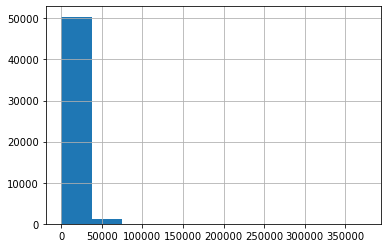

The distribution is skewed to the right
---------------------------------------
Statistics on: price
count     51485.000000
mean      12114.776246
std       10024.620009
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16800.000000
max      375000.000000
Name: price, dtype: float64
---------------------------------------
min border: -12700.0
max border: 34500.0
---------------------------------------
The outliers are considered to be values above 34500.0
We have 1612 values that we can consider outliers


In [79]:
distribution_IQR('price')

In [80]:
def distribution_percentile(parameter):
    print('The histogram of: {}'.format(parameter))
    data[parameter].hist()
    plt.show()
    if data[parameter].mean()>data[parameter].median():
        print('The distribution is skewed to the right')
    else:
        print('The distribution is skewed to the left')
    print('---------------------------------------')
    print('Statistics on: {}'.format(parameter))
    print(data[parameter].describe())
    #data[parameter].describe()
    ninety_eight = np.percentile(data[parameter], 98)
    three = np.percentile(data[parameter], 3)
    print('---------------------------------------')
    print('min border:',three)
    print('max border:',ninety_eight)
    print('---------------------------------------')
    print('The outliers are considered to be values below',three, "and above",ninety_eight)
    print('We have',len(data[(data[parameter]<three)|(data[parameter]>ninety_eight)]),"values that we can consider outliers")


The histogram of: price


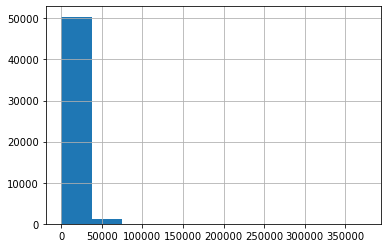

The distribution is skewed to the right
---------------------------------------
Statistics on: price
count     51485.000000
mean      12114.776246
std       10024.620009
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16800.000000
max      375000.000000
Name: price, dtype: float64
---------------------------------------
min border: 1000.0
max border: 37995.0
---------------------------------------
The outliers are considered to be values below 1000.0 and above 37995.0
We have 2432 values that we can consider outliers
The histogram of: vehicle_age


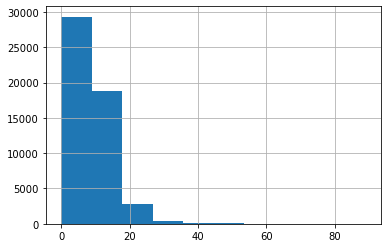

The distribution is skewed to the right
---------------------------------------
Statistics on: vehicle_age
count    51485.000000
mean         8.434962
std          6.127674
min          0.000000
25%          4.000000
50%          7.000000
75%         12.000000
max         89.000000
Name: vehicle_age, dtype: float64
---------------------------------------
min border: 0.0
max border: 23.0
---------------------------------------
The outliers are considered to be values below 0.0 and above 23.0
We have 885 values that we can consider outliers
The histogram of: odometer


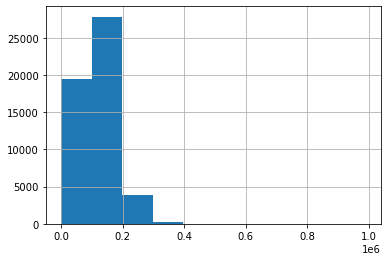

The distribution is skewed to the left
---------------------------------------
Statistics on: odometer
count     51485.000000
mean     115338.062708
std       60638.042771
min           0.000000
25%       77000.000000
50%      115376.000000
75%      148177.000000
max      990000.000000
Name: odometer, dtype: float64
---------------------------------------
min border: 10443.0
max border: 250839.4
---------------------------------------
The outliers are considered to be values below 10443.0 and above 250839.4
We have 2574 values that we can consider outliers
The histogram of: car_category


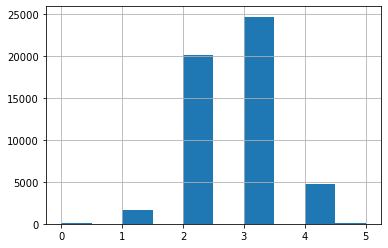

The distribution is skewed to the left
---------------------------------------
Statistics on: car_category
count    51485.000000
mean         2.637254
std          0.712652
min          0.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: car_category, dtype: float64
---------------------------------------
min border: 1.0
max border: 4.0
---------------------------------------
The outliers are considered to be values below 1.0 and above 4.0
We have 258 values that we can consider outliers
The histogram of: cylinders


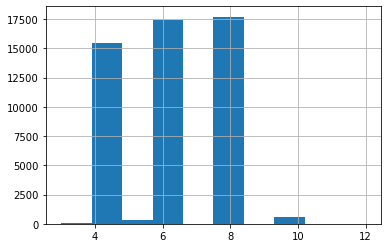

The distribution is skewed to the right
---------------------------------------
Statistics on: cylinders
count    51485.000000
mean         6.121162
std          1.658097
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64
---------------------------------------
min border: 4.0
max border: 8.0
---------------------------------------
The outliers are considered to be values below 4.0 and above 8.0
We have 585 values that we can consider outliers


In [81]:
for parameter in ['price','vehicle_age','odometer','car_category', 'cylinders']:
    distribution_percentile(parameter)



In [82]:
condition_dict.keys()

dict_keys(['new', 'like new', 'excellent', 'good', 'fair', 'salvage'])

Out of this observations, i don't want to remove outliers in the columns 'car_category' and 'cylinders, because doing that won't help to have a better reading of distribution and it will affect the informations I am looking for. Outliers can be very informative about the subject-area 

## Study and treat outliers

Given the results above, determine what columns may contain outliers, and create a DataFrame without those outliers.

Following, I will determine the upper limits and lower limits of outliers: I want to consider not more than 2% of the whole data.

In [83]:
border_list=[]
for parameter in ['price','vehicle_age','odometer']:
    ninety_eight = np.percentile(data[parameter], 98)
    three = np.percentile(data[parameter], 3)
    border_list.append([parameter,three,ninety_eight])
    



In [84]:
border_list



[['price', 1000.0, 37995.0],
 ['vehicle_age', 0.0, 23.0],
 ['odometer', 10443.0, 250839.4]]

Store data without outliers in a separate DataFrame

In [85]:

border_data=pd.DataFrame(border_list,columns=['parameter','min_border','max_border'])
border_data


,parameter,min_border,max_border
0,price,1000.0,37995.0
1,vehicle_age,0.0,23.0
2,odometer,10443.0,250839.4


I want to filter the dataframe by upper limits outliers, because I don't want to lose too much data and the lower limit outliers can store useful information (for example a vehicle age=0 is new, I don't want to ignore new cars)

In [86]:
data_clean=data.copy()

In [87]:
data_clean=data_clean.query('price<37995 & vehicle_age < 23 & odometer<250839')

In [88]:
data.describe()

,price,model_year,cylinders,odometer,days_listed,weekday_posted,month_posted,year_posted,vehicle_age,mileage_per_year,car_category
count,51485.000000,51485.000000,51485.000000,51485.000000,51485.000000,51485.000000,51485.000000,51485.000000,51485.000000,51485.000000,51485.000000
mean,12114.776246,2009.872487,6.121162,115338.062708,39.556706,3.005361,6.628474,2018.307449,8.434962,19399.123436,2.637254
std,10024.620009,6.113982,1.658097,60638.042771,28.208835,1.997690,3.474240,0.461441,6.127674,17078.744362,0.712652
min,1.000000,1929.000000,3.000000,0.000000,0.000000,0.000000,1.000000,2018.000000,0.000000,0.000000,0.000000
25%,5000.000000,2007.000000,4.000000,77000.000000,19.000000,1.000000,3.000000,2018.000000,4.000000,10514.285714,2.000000
50%,9000.000000,2011.000000,6.000000,115376.000000,33.000000,3.000000,7.000000,2018.000000,7.000000,15162.090909,3.000000
75%,16800.000000,2014.000000,8.000000,148177.000000,53.000000,5.000000,10.000000,2019.000000,12.000000,22468.000000,3.000000
max,375000.000000,2019.000000,12.000000,990000.000000,271.000000,6.000000,12.000000,2019.000000,89.000000,373200.000000,5.000000


In [89]:
data_clean.describe()

,price,model_year,cylinders,odometer,days_listed,weekday_posted,month_posted,year_posted,vehicle_age,mileage_per_year,car_category
count,48437.000000,48437.000000,48437.000000,48437.000000,48437.000000,48437.000000,48437.000000,48437.000000,48437.000000,48437.000000,48437.000000
mean,11568.487933,2010.334207,6.060821,112730.459287,39.535809,3.000702,6.633132,2018.306646,7.972438,19304.685240,2.644941
std,8212.176356,4.966748,1.657028,53123.004334,28.188862,1.997211,3.473038,0.461106,4.980195,16154.765162,0.697578
min,1.000000,1996.000000,3.000000,0.000000,0.000000,0.000000,1.000000,2018.000000,0.000000,0.000000,0.000000
25%,5000.000000,2007.000000,4.000000,78465.000000,19.000000,1.000000,3.000000,2018.000000,4.000000,10700.000000,2.000000
50%,9000.000000,2011.000000,6.000000,114910.000000,33.000000,3.000000,7.000000,2018.000000,7.000000,15172.000000,3.000000
75%,16000.000000,2014.000000,8.000000,146000.000000,53.000000,5.000000,10.000000,2019.000000,11.000000,22356.500000,3.000000
max,37990.000000,2019.000000,12.000000,250825.000000,271.000000,6.000000,12.000000,2019.000000,22.000000,213539.000000,5.000000


my new dataframe is indeed smaller in size.

## Study core parameters without outliers

array([<AxesSubplot:title={'center':'price'}>], dtype=object)

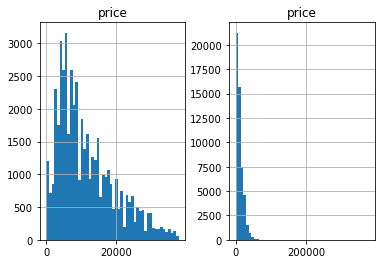

In [90]:
fig, axes = plt.subplots(1, 2)

data_clean.hist('price', bins=50, ax=axes[0])
data.hist('price', bins=50, ax=axes[1])

array([<AxesSubplot:title={'center':'odometer'}>], dtype=object)

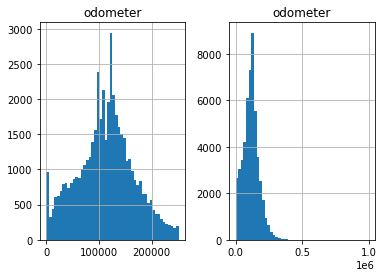

In [91]:
fig, axes = plt.subplots(1, 2)

data_clean.hist('odometer', bins=50, ax=axes[0])
data.hist('odometer', bins=50, ax=axes[1])

array([<AxesSubplot:title={'center':'vehicle_age'}>], dtype=object)

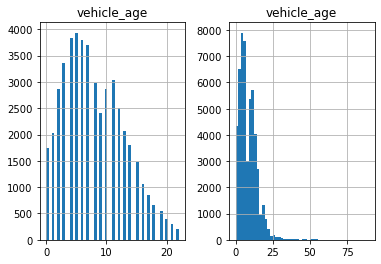

In [92]:
fig, axes = plt.subplots(1, 2)

data_clean.hist('vehicle_age', bins=50, ax=axes[0])
data.hist('vehicle_age', bins=50, ax=axes[1])

Removing cars older than 20, years allow us to have a more consistent distribution, therefore more reliable calculation of tendencies.car that old tend to be classic and antique, with a wide variety of prices, it would skew all the data and give us a non reliable descriptions of correlation

## Ads lifetime

1.Study how many days advertisements were displayed (`days_listed`).2. Calculate the mean and median.3. Describe the typical lifetime of an ad. 4. Determine when ads were removed quickly, and when they were listed for an abnormally long time.

In [93]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48437 entries, 0 to 51524
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   price             48437 non-null  int64         
 1   model_year        48437 non-null  int64         
 2   model             48437 non-null  object        
 3   condition         48437 non-null  object        
 4   cylinders         48437 non-null  float64       
 5   fuel              48437 non-null  object        
 6   odometer          48437 non-null  float64       
 7   transmission      48437 non-null  object        
 8   type              48437 non-null  object        
 9   paint_color       48437 non-null  object        
 10  is_4wd            48437 non-null  bool          
 11  date_posted       48437 non-null  datetime64[ns]
 12  days_listed       48437 non-null  int64         
 13  weekday_posted    48437 non-null  int64         
 14  month_posted      4843

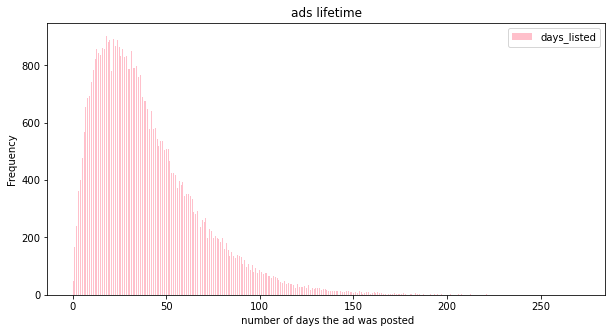

In [94]:
data_clean.days_listed.plot(kind='hist', bins=500, figsize=(10,5), color='pink', legend=True)
plt.title('ads lifetime')
plt.xlabel(' number of days the ad was posted')
plt.show()

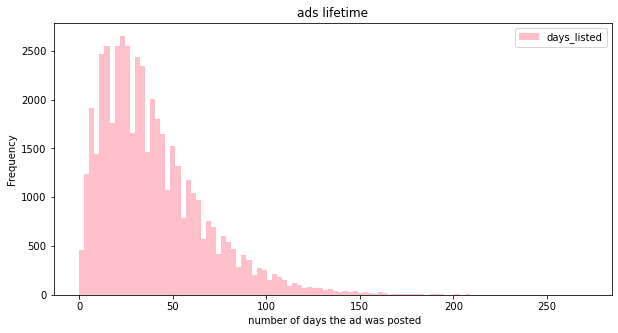

In [95]:
data_clean.days_listed.plot(kind='hist', bins=100, figsize=(10,5), color='pink', legend=True)
plt.title('ads lifetime')
plt.xlabel(' number of days the ad was posted')
plt.show()

we can easily spot a right skewed distribution:the mean is typically greater than the median. Also notice that the tail of the distribution on the right hand (positive) side is longer than on the left hand side.



In [96]:
data_clean['days_listed'].median()

33.0

In [97]:
data_clean['days_listed'].mean()

39.53580940190351

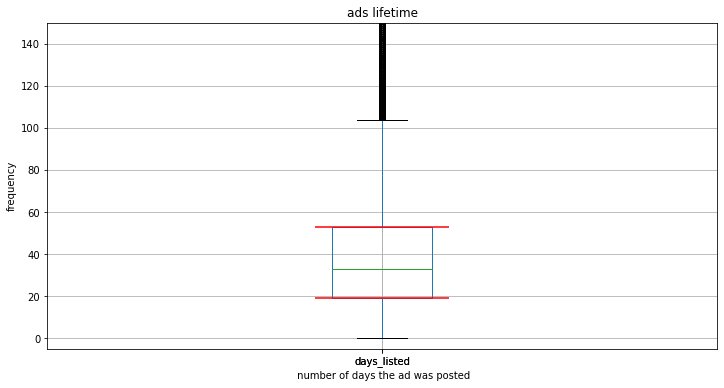

In [98]:
data_clean.boxplot(column='days_listed', figsize=(12,6))
plt.ylim(-5, 150)
Q1 = data_clean['days_listed'].quantile(0.25)
Q3 = data_clean['days_listed'].quantile(0.75)
data_clean.boxplot(column='days_listed')
plt.ylim(-5, 150)
plt.hlines(y=[Q1, Q3], xmin=0.9, xmax=1.1, color='red') 

plt.title('ads lifetime')
plt.xlabel(' number of days the ad was posted')
plt.ylabel('frequency')
plt.show()



<div class="alert alert-block alert-warning">

    
In order not to show auxiliary python outputs like "matplotlib.axes._subplots.AxesSubplot at 0x7f5feaf7fc90 ', you can add a semicolon or plt.show () at the end of the line.

Since the data about days being displayed, is clearly skewed, doesn't make much sense to use a boxplot to find the'outliers'. i will find the 

In [99]:
np.percentile(data_clean.days_listed, 95)

94.0

In [100]:
np.percentile(data_clean.days_listed,5)

7.0

**The typical lifetime of an ad, ranges from 7 days to 95, so we can expect to have ads displayed from a week up to (more or less) a month and a half. We can determine that below a week of time, ads were removed quickly, and they were listed for an abnormally long time if they were displayed for more than 94 days.**

I want to see  if there is any pattern between the date of posting and the ad lifetime. Since we analize a sample throughout an year, i will take into consideration days of posting and months:

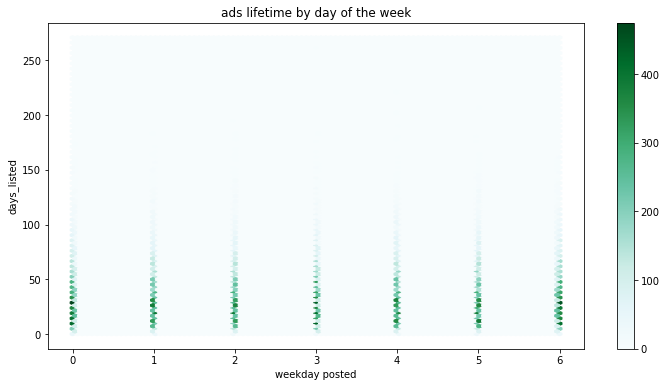

In [101]:
data_clean.plot(x='weekday_posted', y='days_listed', kind='hexbin', figsize=(12,6),sharex=False )

plt.title('ads lifetime by day of the week')
plt.xlabel('weekday posted')
plt.ylabel('days_listed')
plt.show()
 

The distribution looks similar for each day of the week, it doesn't really matter which day you post an ad. It seems, though, that the ads posted on thursday, have a slightly shorter life. Maybe people are more free toward the end of the week, so they can read the ad, call the person and start all the game of purchase.

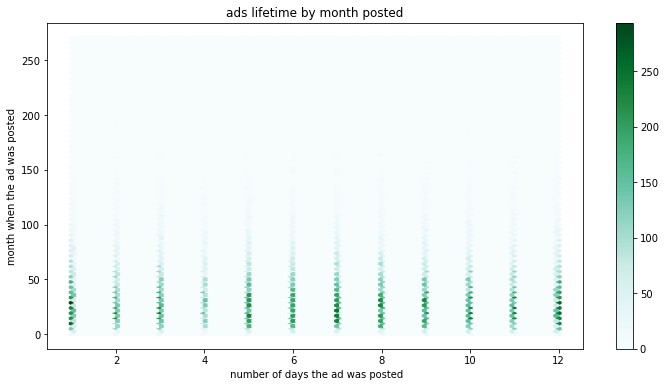

In [102]:
data_clean.plot(x='month_posted', y='days_listed', kind='hexbin', figsize=(12,6), sharex=False )
plt.title('ads lifetime by month posted')
plt.xlabel(' number of days the ad was posted')
plt.ylabel('month when the ad was posted')
plt.show()


From this plot we can deduce that the ads posted during summer(may_september) have a longer lifetime than those posted during springtime( feb-april).

## Average price per each type of vehicle

I will analyze the number of ads and the average price for each type of vehicle. Then, plot a graph showing the dependence of the number of ads on the vehicle type. 

In [103]:
data_pivot = data_clean.pivot_table(index='type', values='price',  aggfunc=['count', 'mean'])

In [104]:
data_pivot

,count,mean
,price,price
type,,
SUV,11909,10715.536233
bus,21,18107.428571
convertible,336,13169.178571
coupe,2004,13820.707086
hatchback,1004,6842.271912
mini-van,1141,8072.185802
offroad,181,14877.994475
other,235,10773.923404


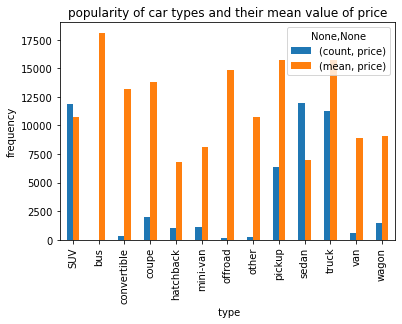

In [105]:
data_pivot.plot(kind='bar')
plt.title('popularity of car types and their mean value of price')
plt.xlabel(' type')
plt.ylabel('frequency')
plt.show()


*let's try a bit different method:*

In [106]:
ads_count=data_clean.groupby('type')['price'].agg(ads_count='count')

In [107]:
ads_count.sort_values(by='ads_count', ascending=False)

,ads_count
type,
sedan,11960
SUV,11909
truck,11239
pickup,6335
coupe,2004
wagon,1494
mini-van,1141
hatchback,1004
van,578


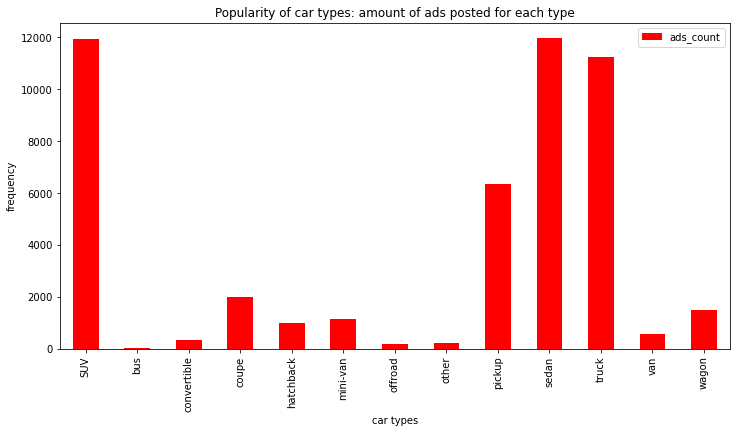

In [108]:
ads_count.plot(kind='bar', color='red', figsize=(12,6))
plt.title('Popularity of car types: amount of ads posted for each type')
plt.xlabel('car types')
plt.ylabel('frequency')
plt.show()


***By the number of ads placed, we can determine the top 5 most popular kind of car: 1. SUV, 2. Sedan, 3. Pickup, 4. Truck***

In [109]:
mean_price=data_clean.groupby('type')['price'].agg(mean_price='mean')

In [110]:
mean_price

,mean_price
type,
SUV,10715.536233
bus,18107.428571
convertible,13169.178571
coupe,13820.707086
hatchback,6842.271912
mini-van,8072.185802
offroad,14877.994475
other,10773.923404
pickup,15720.595107


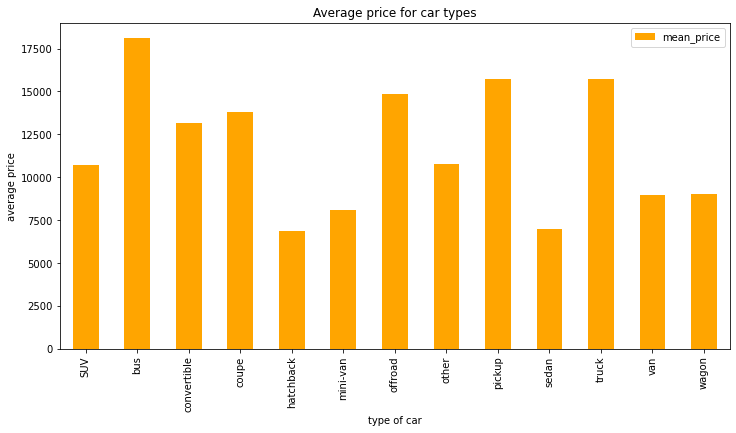

In [111]:
mean_price.plot(kind='bar', color='orange', figsize=(12,6))
plt.title('Average price for car types')
plt.xlabel('type of car')
plt.ylabel('average price')
plt.show()


We can easily see that the price of the cars depends on the type. lets' study the 2 most popular kinds of car: SUV and Sedan

## Price factors

Following, I will create a new dataframe, by extracting the data of price, age, mileage and condition,for the type"sedan". I will then study the correlation

In [112]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48437 entries, 0 to 51524
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   price             48437 non-null  int64         
 1   model_year        48437 non-null  int64         
 2   model             48437 non-null  object        
 3   condition         48437 non-null  object        
 4   cylinders         48437 non-null  float64       
 5   fuel              48437 non-null  object        
 6   odometer          48437 non-null  float64       
 7   transmission      48437 non-null  object        
 8   type              48437 non-null  object        
 9   paint_color       48437 non-null  object        
 10  is_4wd            48437 non-null  bool          
 11  date_posted       48437 non-null  datetime64[ns]
 12  days_listed       48437 non-null  int64         
 13  weekday_posted    48437 non-null  int64         
 14  month_posted      4843

In [113]:
data_sedan=data_clean.query('type =="sedan"')[['price','vehicle_age', 'odometer', 'car_category' ]]

In [114]:
data_sedan.sample()

,price,vehicle_age,odometer,car_category
51241,8999,5,55628.0,4


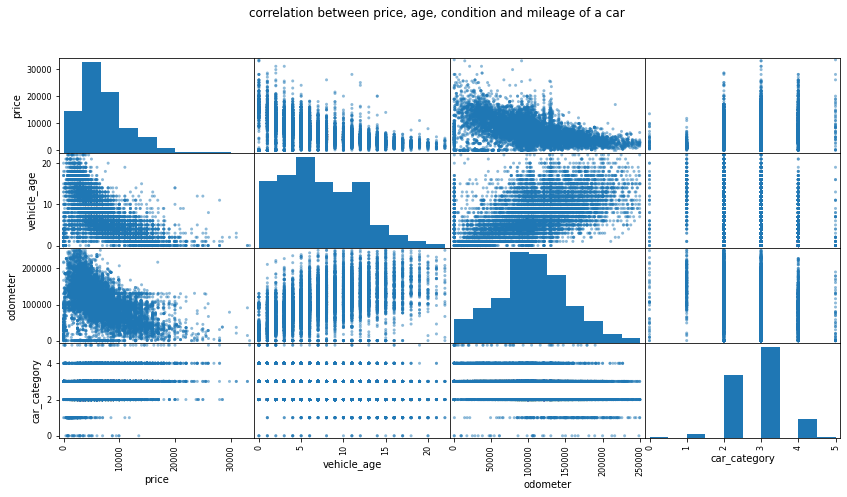

In [115]:
pd.plotting.scatter_matrix(data_sedan, figsize=(14,7))

plt.suptitle('correlation between price, age, condition and mileage of a car')

plt.show()


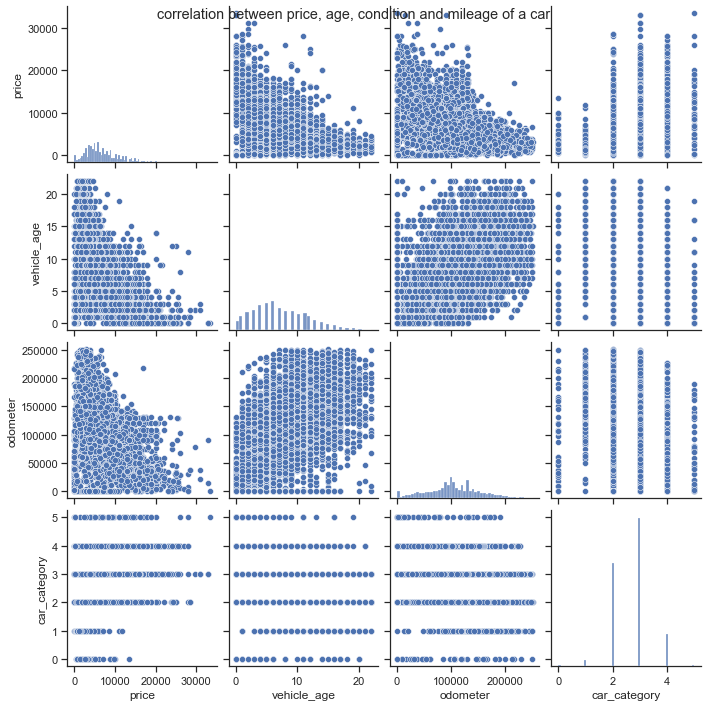

In [116]:
sns.set_theme(style="ticks")
sns.pairplot(data_sedan).fig.suptitle('correlation between price, age, condition and mileage of a car')

plt.show()

In [117]:
data_sedan.corr()

,price,vehicle_age,odometer,car_category
price,1.000000,-0.606532,-0.504259,0.290688
vehicle_age,-0.606532,1.000000,0.541358,-0.290065
odometer,-0.504259,0.541358,1.000000,-0.291000
car_category,0.290688,-0.290065,-0.291000,1.000000


by studying the scatter matrix and the correlation coefficients, it's possible to state that the price of a 'sedan' kind of car, has a moderate negative relationship with the vehicle's age and it's mileage. Price and car conditions(column car_category)have a weak positive relationship.

In [118]:
data_sedan_categorical=data_clean.query('type =="sedan"and paint_color !=("yellow","purple","orange")')[['price','transmission', 'paint_color' ]] 
data_sedan_categorical['paint_color'].value_counts()

unknown    2148
silver     2027
black      1754
grey       1608
white      1479
blue       1216
red         934
custom      295
brown       250
green       196
Name: paint_color, dtype: int64

I added the condition for colours, after i checked the value counts

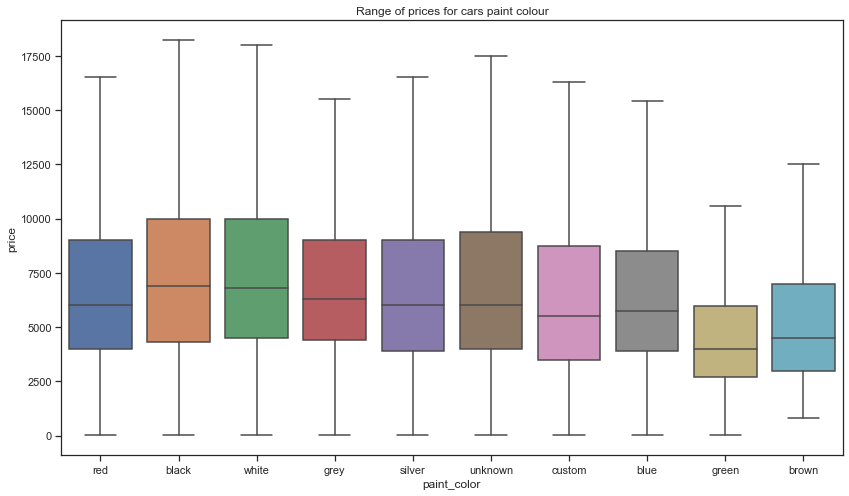

In [119]:
plt.figure(figsize=(14,8))
ax=sns.boxplot(x="paint_color", y="price", data=data_sedan_categorical, showfliers = False).set(title='Range of prices for cars paint colour')

plt.show()

For sedan, the colour doesn't seem to have a big impact on the price with the exception of green paint, which seem to be not really appreciated, therefore tehy present a lower range of price. Orange, yellow and purple are less than 50 values for each, so they are not representative categories.


In [120]:
data_sedan_categorical['transmission'].value_counts()

automatic    11207
manual         571
other          129
Name: transmission, dtype: int64

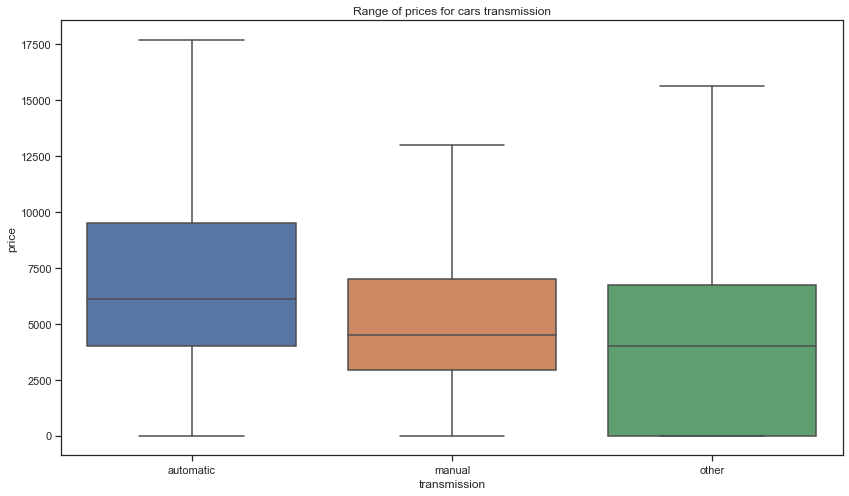

In [121]:
plt.figure(figsize=(14,8))
ax=sns.boxplot(x="transmission", y="price", data=data_sedan_categorical, showfliers = False).set(title='Range of prices for cars transmission')


for Sedan, manual transmission show a non-negligible difference in price, compared to automatic, whic seems to have way higher ranges of price.

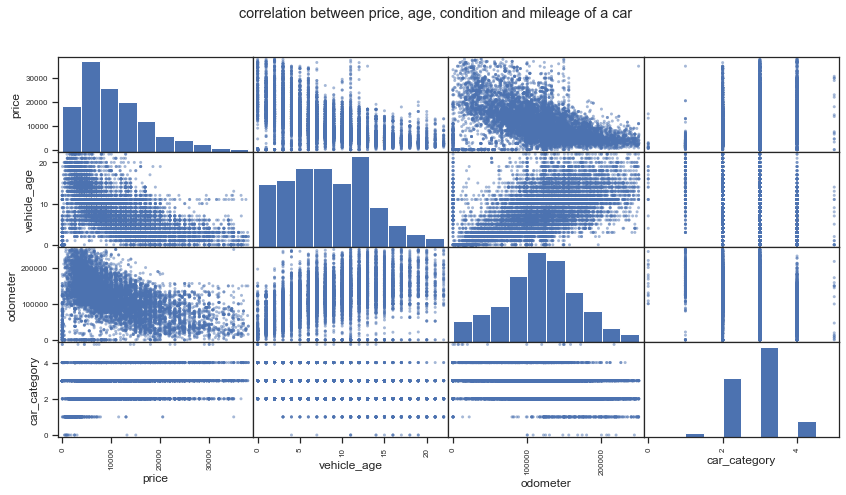

,price,vehicle_age,odometer,car_category
price,1.000000,-0.571457,-0.48548,0.264037
vehicle_age,-0.571457,1.000000,0.55582,-0.300767
odometer,-0.485480,0.555820,1.00000,-0.300050
car_category,0.264037,-0.300767,-0.30005,1.000000


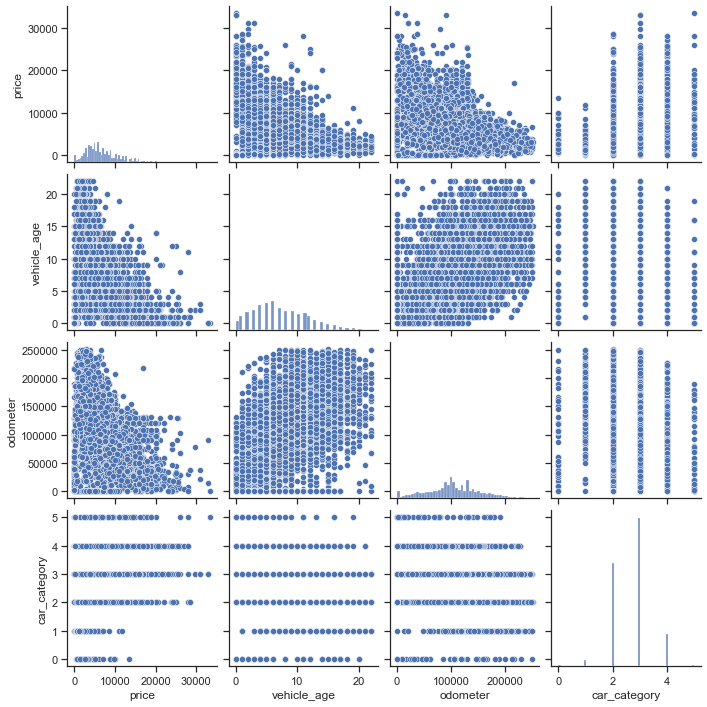

In [122]:
data_suv=data_clean.query('type =="SUV"')[['price','vehicle_age', 'odometer', 'car_category' ]]
pd.plotting.scatter_matrix(data_suv, figsize=(14,7))
plt.suptitle('correlation between price, age, condition and mileage of a car')
plt.show()

sns.pairplot(data_sedan)

data_suv.corr()

by studying the scatter matrix and the correlation coefficients, it's possible to state that the price of a 'SUV' kind of car, has a moderate negative relationship with the vehicle's age and it's mileage. Price and car conditions(column car_category)have a weak positive relationship. 


In [123]:
data_suv_categorical=data_clean.query('type =="SUV"and paint_color !=("yellow","purple")')[['price','transmission', 'paint_color' ]] 


In [124]:
data_suv_categorical['paint_color'].value_counts()

unknown    2147
black      2099
white      1883
silver     1529
grey       1154
blue       1008
red         871
green       403
brown       352
custom      298
orange       82
Name: paint_color, dtype: int64

In [125]:
data_suv_categorical['transmission'].value_counts()

automatic    11224
manual         444
other          158
Name: transmission, dtype: int64

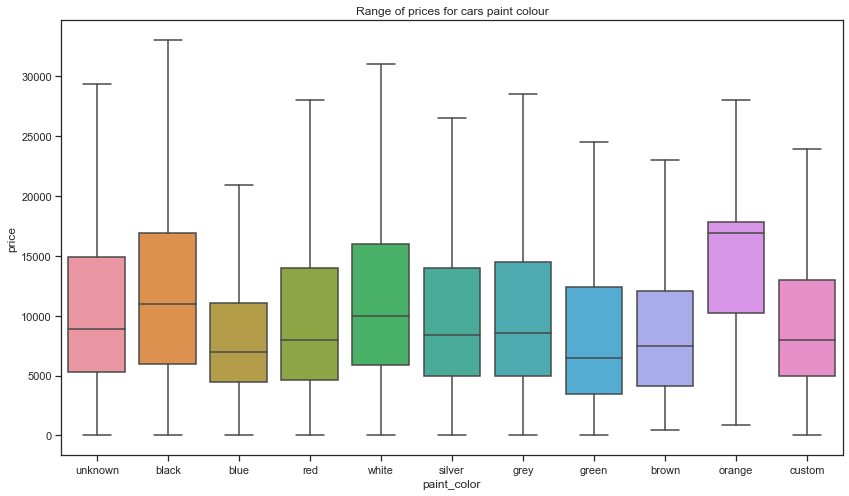

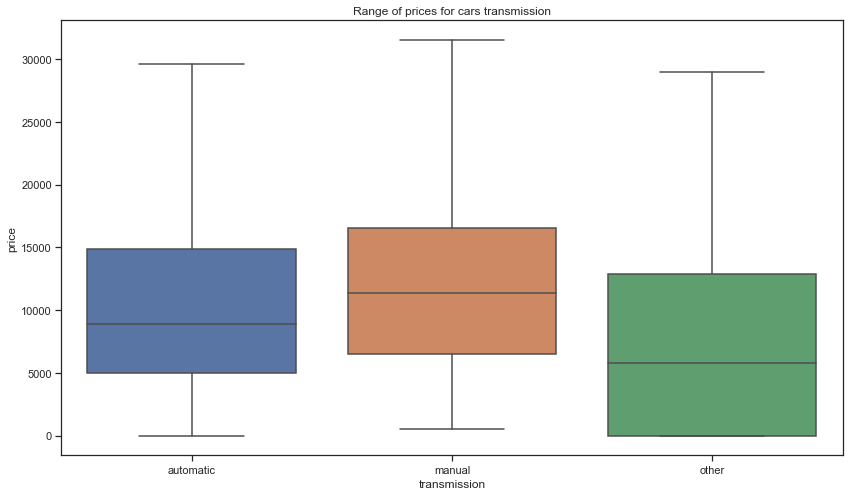

In [126]:
plt.figure(figsize=(14,8))
ax=sns.boxplot(x="paint_color", y="price", data=data_suv_categorical, showfliers = False).set(title='Range of prices for cars paint colour')
plt.show()
plt.figure(figsize=(14,8))
ax=sns.boxplot(x="transmission", y="price", data=data_suv_categorical, showfliers = False).set(title='Range of prices for cars transmission')
plt.show()

on SUV's the color has an impact on the price: Black and orange  cars are generally more expensive. Blue, instead, is not really appreciated, it costs less.

on SUV, the automatic trasmission determine a slightly lower range of prices.

## General conclusion

To sum up the results of this analysis, we can state that, on this sample of ads, the average price of a car is determined by many factors:
first of all the type: a bus or a coupe will cost much more than a sedan or a miniva; so the cylinders have an indirect impact, cause they depend on the type. Same observation can be done for the 4 wheels drive feature. By the same kind of cars, we found out that the 2 most impactful factors are the age of the vehicle, it's mileage, and the type of transmission. Less important factors are the paint's colors and the car's condition. 
The older the vehichle, and the more mileage a vehichle has, the lesser will be the price.